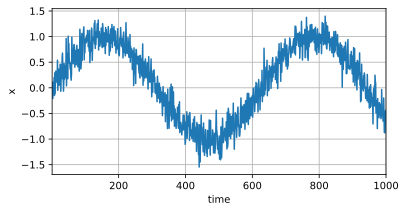

In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l


T = 1000 # 总共产生1000个点
time = torch.arange(1,T+1,dtype = torch.float32)

#  计算Y  需要添加噪声
x = torch.sin(0.01 * time)+  torch.normal(0,0.2,(T,))

d2l.plot(time,[x],'time','x',xlim=[1,1000],figsize=(6,3))

In [3]:
print(x)

tensor([-7.2712e-02,  1.1072e-01, -2.0729e-01,  1.4950e-02, -8.2087e-03,
         5.2916e-02,  2.0174e-01, -1.5037e-01,  2.9170e-01, -1.1450e-01,
         2.2505e-01,  3.2602e-01,  3.2037e-01,  2.0358e-01,  1.2767e-01,
         9.9728e-02,  5.3773e-01, -4.6854e-02,  3.0776e-01,  3.6621e-01,
         2.8652e-01,  4.9686e-02,  3.3634e-01,  2.9968e-01,  4.6015e-01,
         1.2070e-01, -6.6616e-02,  1.6030e-01,  4.5078e-01,  1.7582e-01,
         5.9667e-01,  6.7657e-01,  3.7427e-01,  2.6060e-01, -6.3143e-02,
         1.2515e-01,  4.7006e-01,  1.6811e-01,  3.1496e-01,  3.0561e-01,
         4.3272e-01,  2.0142e-01,  9.6150e-01,  3.9284e-02,  3.4154e-01,
         3.5927e-01,  6.7168e-01,  1.7816e-01,  1.0071e+00,  5.1470e-01,
         8.6503e-01,  5.6199e-01,  4.7496e-01,  4.9068e-01,  3.6848e-01,
         4.7488e-01,  2.2737e-01,  1.4940e-01,  2.7972e-01,  9.8970e-01,
         7.0480e-01,  5.2638e-01,  6.4973e-01,  4.6953e-01,  7.0097e-01,
         8.3508e-01,  8.4572e-01,  7.6618e-01,  4.0

In [6]:
tau = 4  # 步长

# 
features= torch.zeros((T-tau),tau)

print(features)

print(features.shape)

for i in range(tau):
    features[:,i] = x[i:T - tau + i]

print(features)

labels = x[tau:].reshape((-1,1))




tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.Size([996, 4])
tensor([[-0.0727,  0.1107, -0.2073,  0.0149],
        [ 0.1107, -0.2073,  0.0149, -0.0082],
        [-0.2073,  0.0149, -0.0082,  0.0529],
        ...,
        [-0.5885, -0.8740, -0.4601, -0.8775],
        [-0.8740, -0.4601, -0.8775, -0.4615],
        [-0.4601, -0.8775, -0.4615, -0.7054]])


In [7]:
batch_size ,n_train = 16,600

#  只有前n_train个样本用于训练
train_iter = d2l.load_array((features[:n_train],labels[:n_train]),batch_size,is_train=True)

In [8]:
#  初始化网络权重的函数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight)


# 多层感知机
def get_net():
    net = nn.Sequential(nn.Linear(4,10),
                        nn.ReLU(),nn.Linear(10,1))
    
    net.apply(init_weights)

    return net
loss = nn.MSELoss(reduction='none')

In [9]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.061710
epoch 2, loss: 0.054285
epoch 3, loss: 0.054527
epoch 4, loss: 0.052255
epoch 5, loss: 0.052154


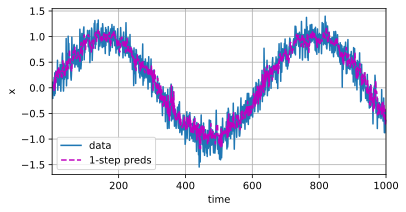

In [10]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000],
         figsize=(6, 3))